In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [37]:
%autoreload
# settings_of(153)
s = {'document_features_ev': 'J+N+AN+NN',
     'document_features_tr': 'J+N+AN+NN',
#      'expansions__allow_overlap': 0, # there's a bunch of experiments with overlap
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__entries_of_id': None,
     'expansions__k': 3,
     'expansions__neighbour_strategy': 'linear',
     'expansions__noise': 0.0,
     'expansions__use_random_neighbours': 0,
     'expansions__use_similarity': 0,
     'expansions__vectors__algorithm': 'word2vec',
#      'expansions__vectors__composer': 'Add',
     'expansions__vectors__dimensionality': 100,
     'expansions__vectors__rep': 0,
#      'expansions__vectors__unlabelled': 'gigaw',
#      'expansions__vectors__unlabelled_percentage': 100,
     'expansions__vectors__use_ppmi': 0,
     'labelled': 'amazon_grouped-tagged'}

In [38]:
# s['document_features_ev'] = 'AN+NN'
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
df = dataframe_from_exp_ids?

In [40]:
fields = {'unlab': 'expansions__vectors__unlabelled',
        'percent': 'expansions__vectors__unlabelled_percentage',
        'comp': 'expansions__vectors__composer',
         'overlap': 'expansions__allow_overlap'}
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]

score has 12000 values
unlab has 12000 values
overlap has 12000 values
folds has 12000 values
comp has 12000 values
percent has 12000 values


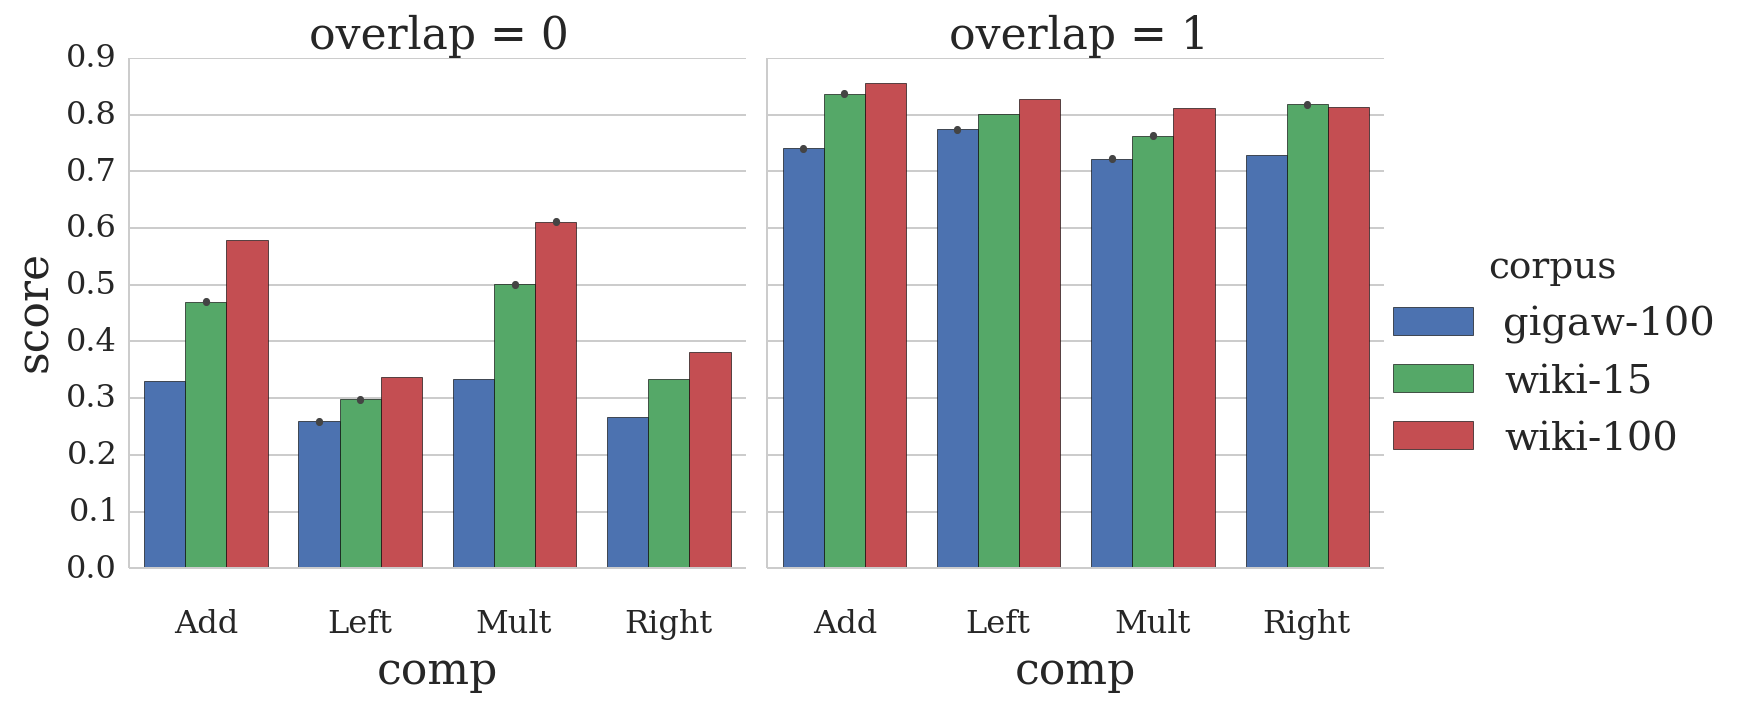

In [54]:
sns.factorplot(y='score', x='comp', hue='corpus', col='overlap', 
               hue_order=sort_df_by(df, 'corpus'), 
               data=df, kind='bar');